# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('ConstructionTimeSeriesDataV2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


# Plot Initial Data

e:\Users\MainBrain\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Arial Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


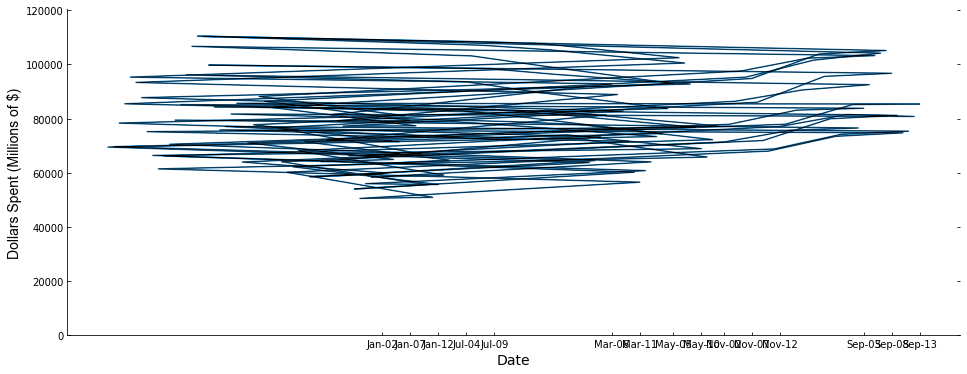

In [3]:
x = df['Month-Year']
y = df['Total Construction']

fig,ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,y,color='k',linewidth=.5,label='Time Series Plot')

ax.grid(False)
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True, direction='in')
ax.yaxis.set_tick_params(which = 'both', right = True, left = True, labelleft = True, direction='in')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Date',fontsize='14',fontname='Arial Narrow')
ax.set_ylabel('Dollars Spent (Millions of $)',fontsize='14',fontname='Arial')
ax.set_xticks(x[::10])
ax.set_xticklabels(x[::10])
ax.set_ylim(0,max(y)+10000)
fig.set_size_inches(16,6)

# Create a DatetimeIndex

The 'Month-Year' column ahs some of the information we need to create a DatetimeIndex, but not all: the day number is missing.  Also, it is in the wrong order.  The desired format is yyyy-mm-dd.

We will create a dictionary to map the month abbreviations to the correct month number and also add the day number corresponding to the month-end day number.

In [4]:
df['Month-Year'].head()

0    Jan-02
1    Feb-02
2    Mar-02
3    Apr-02
4    May-02
Name: Month-Year, dtype: object

Here is the date format conversion function.  I will leave it to you to inspect how it works.

In [5]:
date_data = {'Jan' : ('01', '31'), 'Feb' : ('02', '28'), 'Mar' : ('03', '31'), 'Apr' : ('04', '30'), 'May' : ('05', '31'), 'Jun' : ('06', '30'), 'Jul' : ('07', '31'), 'Aug' : ('08', '31'), 'Sep' : ('09', '30'), 'Oct' : ('10', '31'), 'Nov' : ('11', '30'), 'Dec' : ('12', '31')}

def to_data_range(date_str):
    return '20' + date_str[-2:] + '-' + date_data[date_str[:3]][0] + '-' + date_data[date_str[:3]][1]

Let's create a new column with the correct format and call it 'YearMonthDay'.

In [6]:
df['YearMonthDay'] = df['Month-Year'].apply(to_data_range)
df['YearMonthDay'].head()

0    2002-01-31
1    2002-02-28
2    2002-03-31
3    2002-04-30
4    2002-05-31
Name: YearMonthDay, dtype: object

In [7]:
pd.date_range(start=df['YearMonthDay'].iloc[0], end=df['YearMonthDay'].iloc[df.shape[0] - 1], freq='M')

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28'],
              dtype='datetime64[ns]', length=146, freq='M')

Finally, let's replace the dataFrame index with the DatetimeRange we just demonstrated how to create.

In [8]:
df.index = pd.date_range(start=df['YearMonthDay'].iloc[0], end=df['YearMonthDay'].iloc[df.shape[0] - 1], freq='M')

In [9]:
df.index

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28'],
              dtype='datetime64[ns]', length=146, freq='M')

In [10]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex